[Table of Contents](./table-of-contents.ipynb)

## K-Means
The k-means clustering algorithm
is one of the most popular unsupervised clustering algorithms in machine learning for partitioning data into representative clusters. In this section we first review the k-means problem and  continue with the k-means algorithm as an iterative method to approximate to the solution. 
### Story behind:  K-means Problem

The $k$-means algorithm aims to find optimal centroids for different clusters of data that lie in an Euclidean space for a desired number of partitions. We can reformulate the $k$-means problem as an optimization problem as follows:
 
Given a finite set $\mathbb{X}\subset\mathbb{R}^d$ and a positive integer $k\in \mathbb{Z^+}$, we need to find a function $w\colon \mathbb{X}\to \mathbb{R}^d$ such that $|im(w)|=k$ and the following cost function is minimized:
\begin{equation}
\sum_{x\in \mathbb{X}} \|x-w(x)\|^2.
\end{equation}
Our search space for an optimal solution is the set of all functions $w\colon \mathbb{X}\to \mathbb{R}^d$ with $|im(w)|=k$, i.e. we need 

\begin{equation*}
\arg\min_{w} \sum_{x\in \mathbb{X}} \|x-w(x)\|^2.
\end{equation*}

Since the sum of the squared Euclidean distances is minimized when $w$ assigns the mean of the cluster that the data point belongs to, this problem now is equivalent to finding cluster centroids and writing the function $w(x)$ that assigns the centroid of the cluster to each point $x\in\mathbb{X}$.

### Solution: K-means Clustering


The $k$-means clustering algorithm is a multi-pass clustering algorithm, and it requires access to all of the data points multiple times. The algorithm groups the data based on their mutual euclidean distances, and therefore closer data points are more likely to be in the same group. The algorithm takes the mean value of a group as the similarity parameter and  forms clusters by assigning data points based on the closest mean. 

Given a data set $\mathbb{X}=\{x^{t}\}_{t=1}^{N}$, and a positive integer $k$, the algorithm starts by randomly selecting $k$ points as the initial cluster centroids.  
Then it assigns each data point to its closest cluster centroid.  Let $W=\{w_{1}, \ldots, w_{k} \}$ be the initial cluster centroids then  each data point $x^{t} $ is assigned 
 to a cluster based on:
 
\begin{equation*}
w(x) = \arg\min_{w_i \in W} \|w_i - x^{t}\|^2 .
\end{equation*}

Then the algorithm recalculates the cluster centroids $\{w_j\}_{j=1}^{k}$ as the mean of the data points in the current clusters.  


Let $S_i$ be the set of data point assignments for the $i^{th}$ cluster. 
Let us define

\begin{equation}
 h_i^{t} =
 \begin{cases} 
      1 & \text{ if } i = \arg\min_\ell{\|x^t- w_\ell\|} \\ 
      0 & \text{ otherwise }
   \end{cases}
\end{equation}

The batch algorithm, $k$-means, updates the centroids as

\begin{equation} \label{eqkmeans:1.3}
w_i  
= \frac{\sum_t h_i^{t}x^t}{\sum_t h_i^{t}} 
=  \frac{1}{|S_i|} \sum_{x^t \in S_i} x^t
\end{equation}

Data points are reassigned to their new clusters with respect to the new cluster centroids and centroids are updated until the cluster centroids stabilize. 


In [1]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

#synthetical data generation
points, labels = make_blobs(n_samples=600, centers=2, n_features=2,
                       cluster_std=0.7, random_state=123)


In [2]:
def kmeans(points, k, epochs=100, epsilon=1e-9):
    # initialize k centroids randomly from data points
    centroids = points[np.random.choice(np.arange(len(points)), k), :]
    # keep track of the centroids
    trajectories = [centroids]
    for epoch in range(epochs):
        distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
        closest = np.argmin(distances, axis=0)
        # assign each data point to the cluster with the closest centroid
        # update the centroid to be the mean of its cluster’s data points
        centroids = np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])
        trajectories.append(centroids)
        
        # if centroids do not change then break
        if np.abs((trajectories[epoch]-trajectories[epoch-1])).all() < epsilon:
            break          
    return centroids, trajectories

centroids, trj = kmeans(points, k=2)

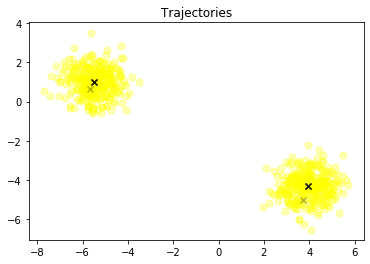

In [3]:
def plot_trajectories(trajectories):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(points[:, 0], points[:, 1], color='yellow',alpha=0.3,  s=50, cmap='viridis')
    alpha_2 = 0.3
    for i in trj:
        plt.scatter(i[:,0],i[:,1], c='k', alpha=alpha_2, marker='x')
        alpha_2 += 0.1
    plt.title('Trajectories')
    plt.show()
    
plot_trajectories(trj)   



#### Convergence
The cost function of $k$-means algorithm is the squared objective function:

\begin{equation}
J(k,W) =\frac{1}{2}
\sum_{t=1}^{N} \sum_{i=1}^{k} h_i^{t}\|w_i -x^{t}\|^2
\end{equation}

The $k$-means algorithm is guaranteed to converge because $J$  is monotonically decreasing, and $J$ is bounded below. However, since $J$ is a non-convex function, it is not guaranteed to converge to its global minimum. In other words, $k$-means can stuck on a local minimum. In other words, 
random initialization of the cluster centroids might give different results. In batch processing, a simple strategy to avoid this situation is to run $k$-means many times using different random initial values for the cluster centroids $w_j$, and then pick the one that gives the lowest value for $J$.




## Competitive Neural Networks 
Competitive learning is a form of *Hebbian learning* which states if two neurons fire simultaneously then the connections between the neurons selectively strengthened i.e *neurons that fire together, wire together.* In a competitive neural network, the neurons "compete" with each other as the one with the highest activation "wins" and moved towards the incoming data. These networks are mainly used for the online clustering problems. 

The input layer contains the input vector $x$, outputs are fully connected and there is no bias unit. In this model, only binary inputs and outputs are considered. Figure below shows the basic structure of a competitive neural network of $k$ perceptrons with recurrent connections at the output. Each unit at the output reinforces its value and tries to suppress the other outputs. Under a suitable arrangement of recurrent weights, the maximum suppresses all the others.

![fig:comp](./images/comp.png)


The values of the output units $O_i$ are perceptrons:

\begin{equation*}
O_i = w_i^{T}\cdot x
\end{equation*}

The activation, of the $i^{th}$ output node is just the inner product of the weight vector of the node and the current input vector: 

\begin{equation}
O_i=\sum_{j=1}^{d} w_{ij} \cdot x_{j}^{t} =w_i^{T}\cdot x^t = \|w_i\| \cdot \|x^t\| \cdot cos{\theta}
\end{equation}

which is closely related to the difference between the two vectors: 

\begin{equation*}
\|w_i -x^t\|^2 = \|w_i\|^2 + \|x^t\|^2 - 2\|w_i\| \cdot \|x^t\|\cdot cos\theta
\end{equation*}

where $\theta$ is the angle between the two vectors.
 
In a competitive network, only one output unit, called *the winner unit*, can be become active at a time. The winner unit $i^*$ is the only node that fires and it has the largest net input. Hence,  we must have

\begin{equation}
w_{i^*}\cdot x \geq w_{i}\cdot x, \text{ for all } i
\end{equation}

where the winning unit $i^*$ has $O_{i^*}=1$. If we normalize all the weights to $\|w_i\|=1$ for every $i$, since we have 

\begin{equation}
\|x-y\|^2=\|x\|^2 - 2 \left<x,y\right> + \|y\|^2
\end{equation}

We see that the winner unit is the one that minimizes the squared distance

\begin{equation}
i^* =  \arg\min_{i=1,\ldots,k} \|w_i - x\|
\end{equation}

where $k$ is the number nodes in the layer.  This means the unit with the minimum Euclidean distance is the same as the one with the maximum dot product. In other words, the winner is the unit with normalized $w$ closest to the input vector $x$.



Assume that we would like to group spherical data points into three clusters that are given as: 


In [5]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
from matplotlib import cm
from sklearn.preprocessing import normalize

def unit_sphere_data_generator(M):
    np.random.seed(56)
    u = np.random.uniform(0,1,M)
    v = np.random.uniform(0,1,M)
    theta = 2 * np.pi * u
    phi = np.arccos((2*v - 1.0))
    c = np.zeros((M,3))
    c[:,0] = np.cos(theta) * np.sin(phi)
    c[:,1] = np.sin(theta) * np.sin(phi)
    c[:,2] = np.cos(phi)
    sphere_points = pd.DataFrame(c)
    # filter if there are any duplicates
    sphere_points_no_duplicates = sphere_points.drop_duplicates()
    generators = sphere_points_no_duplicates.as_matrix()
    return generators

def generate_clusters(num_samples=800):
    points_on_sphere = unit_sphere_data_generator(num_samples)
    
    distinct_data1 = []
    distinct_data2 = []
    distinct_data3 = []
    
    for i in points_on_sphere:
        #If all coordinates are positive and above 0.05
        if np.all(i > 0.05):
            distinct_data1.append(i)
        #If all coordinates are negative and belove -0.05
        elif np.all(i < -0.05):
            distinct_data2.append(i)
        #If x-axis negative and the others positive
        #and between provided values
        elif i[0] < 0 and i[1] > 0 and i[1] < 0.8 and i[2] > 0 and i[2] < 0.5:
            distinct_data3.append(i)
            
    all_data_points = np.vstack((distinct_data1, distinct_data2, distinct_data3))
    return all_data_points

all_data_points = generate_clusters(num_samples=800)

/Users/melodi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


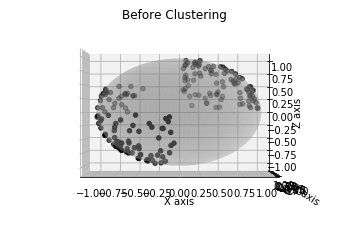

In [6]:
def plot_unit_sphere():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plt3d = plt.subplot(projection='3d')
    #plot unit sphere
    u = np.linspace(0,2*np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u),np.cos(v))
    y = np.outer(np.cos(u),np.sin(v))
    z = np.outer(np.sin(u),np.ones(np.size(v)))
    plt3d.plot_surface(x, y, z, color='w', alpha=0.3)
    return plt3d, (x, y, z)

def plot_data(data):
    # plot unit sphere
    plt3d, _ = plot_unit_sphere()
    #plot data points on the unit sphere
    plt3d.scatter(data[:,0], data[:,1],
    all_data_points[:,2], c='k')
    plt3d.set_xlabel('X axis')
    plt3d.set_ylabel('Y axis')
    plt3d.set_zlabel('Z axis')
    plt3d.view_init(0,-90)
    plt.title('Before Clustering')
    plt.show()

plot_data(all_data_points)

We start by assigning three points randomly selected from the data. As we select data points one by one and feed into the network, only one of the weight outputs one and the winner unit updates its value to that point. 


In [7]:
def competitive_network(X, k, epochs, eta=0.01):
    """
    X: Input data points
    epochs: number of epochs
    eta: learning rate
    """

    # number of data points
    N = X.shape[0]
    
    # it's convenient to choose
    # initial k weights randomly from data points 
    W = X[np.random.choice(np.arange(len(X)),k ), :]
    
    # store the weights to plot weights trajectories
    trj = [W] 
    X2 = (X**2).sum(axis=1)[:,np.newaxis]
    

    for epoch in range(epochs):
        assigned_labels = []
        for i in range(N):
            distance = X2[i:i+1].T-2*np.dot(W,X[i:i+1,:].T)
            +(W**2).sum(axis=1)[:,np.newaxis]
            output = (distance == distance.min(axis=0)[np.newaxis,:]).T 
            output = output.astype("int")
            assigned_labels.append([X[i:i+1,:],output])
            # output=[1,0,0] if first class is winner and so on.
            # So multiplication with "output" in below, 
            # provides update for the winner weight only.
            
            # weight update
            W += eta*(np.dot(output.T,X[i:i+1,:])
                     -output.sum(axis=0)[:,np.newaxis]*W)
            
            # normalize the weights
            W = normalize(W, norm='l2', axis=1)
                  
        trj.append(W)
        # if weights doesn't change then break
        if (trj[epoch] == trj[epoch-1]).all():
            break
            
    return W, trj, assigned_labels


centers, trajectories, labelled_data = competitive_network(all_data_points, k=3, epochs=100, eta=0.01)

Shows the weight trajectories formed following each iteration. When the trajectory gets stabilized we have the regions split into three areas as given below. 

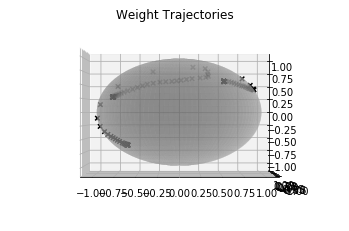

In [8]:
def plot_trajectories(trajectories):
    # plot unit sphere
    plt3d, (x,y,z) = plot_unit_sphere()
    plt3d.plot_surface(x, y, z, color='w', alpha=0.3)
    # plot weight trajectories
    for i in trajectories:
        plt3d.scatter(i[:,0],i[:,1],i[:,2], c='k', marker='x')
        plt3d.view_init(0,-90)
    plt.title('Weight Trajectories')
    plt.show()
    
plot_trajectories(trajectories)

After this separation, we can use these centers as a decision rule for incoming data and test our results.


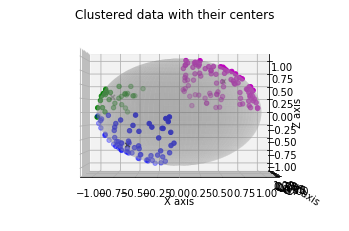

In [9]:
def color_classes(labelled_data):
    pink = []
    blue = []
    green = []
    for i in labelled_data:
        if np.all(i[1][0] == [1,0,0]):
            pink.append(i[0][0])
        elif np.all(i[1][0] == [0,1,0]):
            blue.append(i[0][0])
        elif np.all(i[1][0] == [0,0,1]):
            green.append(i[0][0])
    return np.array(pink), np.array(blue), np.array(green)
pink, blue, green = color_classes(labelled_data)

def plot_clusters(pink, blue, green, centers):
    #plot resulted clusters with the last weights
    plt3d, _ = plot_unit_sphere()
    #plot data points
    plt3d.scatter(pink[:,0],pink[:,1],pink[:,2], c='m')
    plt3d.scatter(green[:,0],green[:,1],green[:,2], c='g')
    plt3d.scatter(blue[:,0],blue[:,1],blue[:,2], c='b')
    #plot centers
    plt3d.scatter(centers[:,0],centers[:,1],centers[:,2], c='k', marker='x')
    plt3d.set_xlabel('X axis')
    plt3d.set_ylabel('Y axis')
    plt3d.set_zlabel('Z axis')
    plt3d.view_init(0,-90)
    plt.title('Clustered data with their centers')
    plt.show()

plot_clusters(pink, blue, green, centers)